In [1]:
# Imports
import pandas as pd
import datetime as dt

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, callbacks
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
atg_obs = pd.read_csv('../../Downloads/LFEM_data--3.csv', low_memory=False, skiprows=1)
atg_obs.insert(0, 'datetime_UTC', pd.to_datetime(atg_obs['Date'] + atg_obs['Time'], format='%Y-%m-%d%H:%M'))
# atg_obs_selected = atg_obs.loc[(atg_obs['datetime_UTC']>=dt.datetime(2020,5,1))].copy() # Selecting dates

In [3]:
atg_obs_selected = atg_obs.copy() # Selecting dates

In [4]:
atg_obs_selected = atg_obs_selected.loc[(atg_obs['datetime_UTC']>=dt.datetime(2004,5,1))]

In [5]:
atg_obs_selected

,datetime_UTC,Pseudo-Julian-Date,Date,Time,Temperature,Dewpoint,Relhum,Speed,Gust,Direction,Pressure,Solar,SumRain,Rain
2472357,2004-05-01 00:00:00,2.453127e+06,2004-05-01,00:00,78.800000,26.000000,14.3,5.900000,6.800000,218,1013.4,492.6,251.09,0.00
2472358,2004-05-01 00:01:00,2.453127e+06,2004-05-01,00:01,78.700000,26.000000,14.3,5.700000,6.500000,220,1013.4,490.1,251.09,0.00
2472359,2004-05-01 00:02:00,2.453127e+06,2004-05-01,00:02,79.400000,26.900000,14.5,5.000000,5.900000,225,1013.4,487.9,251.09,0.00
2472360,2004-05-01 00:03:00,2.453127e+06,2004-05-01,00:03,79.900000,27.500000,14.6,4.000000,5.300000,217,1013.3,485.1,251.09,0.00
2472361,2004-05-01 00:04:00,2.453127e+06,2004-05-01,00:04,79.000000,25.600000,13.9,3.500000,4.700000,219,1013.4,482.3,251.09,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12940427,2024-05-22 20:30:00,2.460454e+06,2024-05-22,20:30,55.900000,41.500000,58.5,6.100000,7.800000,267,1010.8,920.2,969.65,0.00
12940428,2024-05-22 20:31:00,2.460454e+06,2024-05-22,20:31,56.000000,41.700000,58.4,6.600000,9.500000,267,1010.9,756.5,969.65,0.00
12940429,2024-05-22 20:32:00,2.460454e+06,2024-05-22,20:32,56.200000,41.700000,58.2,5.900000,10.100000,357,1010.8,657.9,969.65,0.00
12940430,2024-05-22 20:33:00,2.460454e+06,2024-05-22,20:33,56.400000,42.100000,58.6,8.500000,10.500000,300,1011.0,570.1,969.65,0.00


In [6]:
no_erros_obs = atg_obs_selected.loc[(atg_obs_selected['Rain']!='M')&(atg_obs_selected['Temperature']!='M')&(atg_obs_selected['Pressure']!='M')&(atg_obs_selected['Relhum']!='M')&(atg_obs_selected['Relhum']!='0.00.')].copy()
no_erros_obs['Rain'] = no_erros_obs['Rain'].astype(float)
no_erros_obs['Temperature'] = no_erros_obs['Temperature'].astype(float)
no_erros_obs['Pressure'] = no_erros_obs['Pressure'].astype(float)
no_erros_obs['Relhum'] = no_erros_obs['Relhum'].astype(float)

In [7]:
no_erros_obs

,datetime_UTC,Pseudo-Julian-Date,Date,Time,Temperature,Dewpoint,Relhum,Speed,Gust,Direction,Pressure,Solar,SumRain,Rain
2472357,2004-05-01 00:00:00,2.453127e+06,2004-05-01,00:00,78.8,26.000000,14.3,5.900000,6.800000,218,1013.4,492.6,251.09,0.0
2472358,2004-05-01 00:01:00,2.453127e+06,2004-05-01,00:01,78.7,26.000000,14.3,5.700000,6.500000,220,1013.4,490.1,251.09,0.0
2472359,2004-05-01 00:02:00,2.453127e+06,2004-05-01,00:02,79.4,26.900000,14.5,5.000000,5.900000,225,1013.4,487.9,251.09,0.0
2472360,2004-05-01 00:03:00,2.453127e+06,2004-05-01,00:03,79.9,27.500000,14.6,4.000000,5.300000,217,1013.3,485.1,251.09,0.0
2472361,2004-05-01 00:04:00,2.453127e+06,2004-05-01,00:04,79.0,25.600000,13.9,3.500000,4.700000,219,1013.4,482.3,251.09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12940427,2024-05-22 20:30:00,2.460454e+06,2024-05-22,20:30,55.9,41.500000,58.5,6.100000,7.800000,267,1010.8,920.2,969.65,0.0
12940428,2024-05-22 20:31:00,2.460454e+06,2024-05-22,20:31,56.0,41.700000,58.4,6.600000,9.500000,267,1010.9,756.5,969.65,0.0
12940429,2024-05-22 20:32:00,2.460454e+06,2024-05-22,20:32,56.2,41.700000,58.2,5.900000,10.100000,357,1010.8,657.9,969.65,0.0
12940430,2024-05-22 20:33:00,2.460454e+06,2024-05-22,20:33,56.4,42.100000,58.6,8.500000,10.500000,300,1011.0,570.1,969.65,0.0


In [8]:
first_obs_each_period = no_erros_obs.resample(on='datetime_UTC', rule='1h')
first_obs_each_period

In [9]:
summed_rain_each_period = first_obs_each_period['Rain'].sum()

lightrainfall_times = summed_rain_each_period[(summed_rain_each_period<=0.10)&(summed_rain_each_period>0.0)]
moderaterainfall_times = summed_rain_each_period[(summed_rain_each_period<=0.30)&(summed_rain_each_period>0.10)]
heavyrainfall_times = summed_rain_each_period[(summed_rain_each_period>0.30)]

any_rainfall_times = summed_rain_each_period[(summed_rain_each_period>0.0)]

summed_rain_each_period.loc[lightrainfall_times.index] = 1
summed_rain_each_period.loc[moderaterainfall_times.index] = 2
summed_rain_each_period.loc[heavyrainfall_times.index] = 3
# summed_rain_each_period.loc[any_rainfall_times.index] = 1

In [10]:
# Extract Date, Time, Temperature, SumRain into data array
atg_obs_necessary = pd.DataFrame()
atg_obs_necessary['date'] = first_obs_each_period['Date'].first()
atg_obs_necessary['time'] = first_obs_each_period['Time'].first()
atg_obs_necessary['temperature'] = first_obs_each_period['Temperature'].first()
atg_obs_necessary['pressure'] = first_obs_each_period['Pressure'].first()
atg_obs_necessary['relhum'] = first_obs_each_period['Relhum'].first()
atg_obs_necessary['rainfall_type'] = summed_rain_each_period

data_arr = atg_obs_necessary.values
atg_obs_necessary

,date,time,temperature,pressure,relhum,rainfall_type
datetime_UTC,,,,,,
2004-05-01 00:00:00,2004-05-01,00:00,78.8,1013.4,14.3,0.0
2004-05-01 01:00:00,2004-05-01,01:00,80.0,1013.1,17.2,0.0
2004-05-01 02:00:00,2004-05-01,02:00,79.1,1012.7,16.9,0.0
2004-05-01 03:00:00,2004-05-01,03:00,77.7,1012.7,18.6,0.0
2004-05-01 04:00:00,2004-05-01,04:00,72.2,1013.3,29.9,0.0
...,...,...,...,...,...,...
2024-05-22 16:00:00,2024-05-22,16:00,49.9,1008.8,84.8,0.0
2024-05-22 17:00:00,2024-05-22,17:00,51.0,1009.1,74.8,0.0
2024-05-22 18:00:00,2024-05-22,18:00,54.2,1009.6,63.6,0.0


In [11]:
atg_obs_necessary.loc[atg_obs_necessary['rainfall_type']==2]

,date,time,temperature,pressure,relhum,rainfall_type
datetime_UTC,,,,,,
2004-05-11 09:00:00,2004-05-11,09:00,49.1,1007.6,86.2,2.0
2004-08-06 18:00:00,2004-08-06,18:00,60.1,1007.6,84.4,2.0
2004-08-22 10:00:00,2004-08-22,10:00,63.4,999.8,89.2,2.0
2004-09-01 13:00:00,2004-09-01,13:00,57.6,1012.6,79.6,2.0
2004-09-11 05:00:00,2004-09-11,05:00,64.9,1004.5,72.9,2.0
...,...,...,...,...,...,...
2024-04-30 01:00:00,2024-04-30,01:00,47.9,1014.4,76.0,2.0
2024-05-07 07:00:00,2024-05-07,07:00,46.0,1013.1,91.5,2.0
2024-05-19 11:00:00,2024-05-19,11:00,48.6,1017.7,88.1,2.0


In [12]:
notable_event_times = atg_obs_necessary.loc[atg_obs_necessary['rainfall_type']>=3].index

relevant_times = pd.DataFrame()
for event_time in notable_event_times:
    # event_time = notable_event_times[1]
    if not(event_time in relevant_times.index):
        time_around_event = atg_obs_necessary.loc[event_time-pd.Timedelta(days=30):event_time+pd.Timedelta(days=30)].copy()
        relevant_times = pd.concat([relevant_times, time_around_event])
relevant_times

,date,time,temperature,pressure,relhum,rainfall_type
datetime_UTC,,,,,,
2004-05-01 00:00:00,2004-05-01,00:00,78.8,1013.4,14.3,0.0
2004-05-01 01:00:00,2004-05-01,01:00,80.0,1013.1,17.2,0.0
2004-05-01 02:00:00,2004-05-01,02:00,79.1,1012.7,16.9,0.0
2004-05-01 03:00:00,2004-05-01,03:00,77.7,1012.7,18.6,0.0
2004-05-01 04:00:00,2004-05-01,04:00,72.2,1013.3,29.9,0.0
...,...,...,...,...,...,...
2024-05-22 16:00:00,2024-05-22,16:00,49.9,1008.8,84.8,0.0
2024-05-22 17:00:00,2024-05-22,17:00,51.0,1009.1,74.8,0.0
2024-05-22 18:00:00,2024-05-22,18:00,54.2,1009.6,63.6,0.0


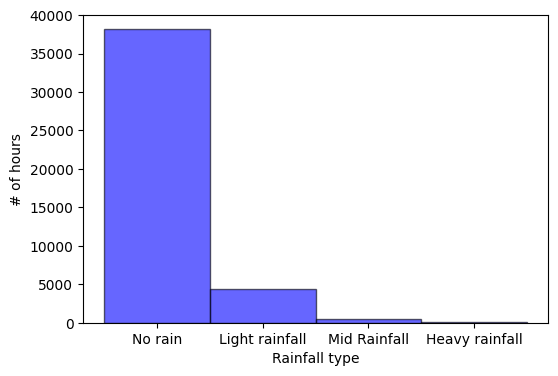

(array([38145,  4341,   464,    47]), array([0, 1, 2, 3, 4]))

In [13]:
rain_counts, classes = np.histogram(relevant_times['rainfall_type'].values, bins=np.arange(0,5))

plt.figure(figsize=(6,4))
# plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,4), width=1, height=rain_counts, facecolor='blue', edgecolor='k', alpha=0.6)
plt.ylabel('# of hours')
plt.xticks(ticks=np.arange(0,4), labels=['No rain', 'Light rainfall', 'Mid Rainfall', 'Heavy rainfall'])
plt.xlabel('Rainfall type')
# plt.yscale('log')
plt.show()
rain_counts, classes

In [14]:
train_val_times, test_times = train_test_split(relevant_times,random_state=42,test_size=0.2)

In [15]:
train_times, val_times = train_test_split(train_val_times,random_state=42,test_size=0.25)

In [16]:
train_times

,date,time,temperature,pressure,relhum,rainfall_type
datetime_UTC,,,,,,
2016-06-18 17:00:00,2016-06-18,17:00,53.4,1015.2,86.6,1.0
2004-10-18 16:00:00,2004-10-18,16:00,50.1,995.6,74.1,0.0
2015-03-12 07:00:00,2015-03-12,07:00,55.2,1016.9,78.5,1.0
2009-05-11 14:00:00,2009-05-11,14:00,49.7,1010.2,85.3,0.0
2020-08-31 06:00:00,2020-08-31,06:00,56.4,1013.6,77.2,0.0
...,...,...,...,...,...,...
2017-10-31 09:00:00,2017-10-31,09:00,46.9,1016.5,66.1,0.0
2007-12-30 02:00:00,2007-12-30,02:00,40.3,1002.5,82.9,0.0
2022-05-29 16:00:00,2022-05-29,16:00,50.2,1008.8,84.9,0.0


In [17]:
val_times

,date,time,temperature,pressure,relhum,rainfall_type
datetime_UTC,,,,,,
2012-11-26 05:00:00,2012-11-26,05:00,40.9,1020.3,81.7,0.0
2020-10-22 22:00:00,2020-10-22,22:00,51.9,1024.8,61.1,0.0
2009-06-04 19:00:00,2009-06-04,19:00,77.3,1005.5,32.1,0.0
2021-12-22 20:00:00,2021-12-22,20:00,50.1,998.8,68.8,0.0
2015-02-21 06:00:00,2015-02-21,06:00,48.3,1020.5,78.6,0.0
...,...,...,...,...,...,...
2004-09-13 20:00:00,2004-09-13,20:00,63.1,1003.5,64.6,0.0
2012-11-19 07:00:00,2012-11-19,07:00,49.4,997.2,73.8,0.0
2009-06-18 18:00:00,2009-06-18,18:00,61.9,1012.3,70.6,0.0


In [18]:
test_times

,date,time,temperature,pressure,relhum,rainfall_type
datetime_UTC,,,,,,
2021-01-07 19:00:00,2021-01-07,19:00,47.1,1021.4,80.0,0.0
2017-10-26 18:00:00,2017-10-26,18:00,52.7,1021.3,81.0,0.0
2009-06-12 05:00:00,2009-06-12,05:00,63.7,1009.9,60.0,0.0
2014-10-19 18:00:00,2014-10-19,18:00,64.7,1003.2,67.0,0.0
2015-11-03 15:00:00,2015-11-03,15:00,46.4,1012.4,85.0,0.0
...,...,...,...,...,...,...
2021-12-12 19:00:00,2021-12-12,19:00,41.4,999.4,67.9,0.0
2023-01-07 20:00:00,2023-01-07,20:00,47.4,1006.1,89.9,1.0
2013-04-13 18:00:00,2013-04-13,18:00,43.3,1008.0,71.6,0.0


In [19]:
def get_processed_df_from_data(dataset):
    date_objs = pd.to_datetime(dataset['date'], format="%Y-%m-%d")
    time_objs = pd.to_datetime(dataset['time'], format='%H:%M')

    days_of_year = pd.DatetimeIndex(date_objs).dayofyear
    months = pd.DatetimeIndex(date_objs).month
    times_in_hours_from_zero = (pd.DatetimeIndex(time_objs).hour + (pd.DatetimeIndex(time_objs).minute/60))
    hours = pd.DatetimeIndex(time_objs).hour

    processed_df = pd.DataFrame()
    processed_df['months_from_july'] = (np.abs(months - 7))
    # processed_df['month'] = months
    processed_df['time_of_day'] = ((hours-8)%24) // 6
    # processed_df['days_of_year'] = days_of_year
    # processed_df['times_in_hours_from_zero'] = times_in_hours_from_zero

    vals = dataset['temperature']
    med_val = vals.median()
    dif_vals = np.abs(vals-med_val)
    max_normval = dif_vals.max()
    norm_vals = 1-(dif_vals/max_normval)
    processed_df['feature_1'] = vals.values

    vals = dataset['relhum']
    med_val = vals.median()
    dif_vals = np.abs(vals-med_val)
    max_normval = dif_vals.max()
    norm_vals = 1-(dif_vals/max_normval)
    processed_df['feature_2'] = vals.values

    vals = dataset['pressure']
    med_val = vals.median()
    dif_vals = np.abs(vals-med_val)
    max_normval = dif_vals.max()
    norm_vals = 1-(dif_vals/max_normval)
    processed_df['feature_3'] = vals.values

    processed_df['class'] = dataset['rainfall_type'].values
    return processed_df

In [20]:
processed_df_train = get_processed_df_from_data(train_times)
processed_df_val = get_processed_df_from_data(val_times)
processed_df_test = get_processed_df_from_data(test_times)

In [21]:
processed_df_train

,months_from_july,time_of_day,feature_1,feature_2,feature_3,class
0,1.0,1.0,53.4,86.6,1015.2,1.0
1,3.0,1.0,50.1,74.1,995.6,0.0
2,4.0,3.0,55.2,78.5,1016.9,1.0
3,2.0,1.0,49.7,85.3,1010.2,0.0
4,1.0,3.0,56.4,77.2,1013.6,0.0
...,...,...,...,...,...,...
25792,3.0,0.0,46.9,66.1,1016.5,0.0
25793,5.0,3.0,40.3,82.9,1002.5,0.0
25794,2.0,1.0,50.2,84.9,1008.8,0.0
25795,4.0,1.0,47.8,87.7,1000.6,1.0


In [22]:
processed_df_val

,months_from_july,time_of_day,feature_1,feature_2,feature_3,class
0,4.0,3.0,40.9,81.7,1020.3,0.0
1,3.0,2.0,51.9,61.1,1024.8,0.0
2,1.0,1.0,77.3,32.1,1005.5,0.0
3,5.0,2.0,50.1,68.8,998.8,0.0
4,5.0,3.0,48.3,78.6,1020.5,0.0
...,...,...,...,...,...,...
8595,2.0,2.0,63.1,64.6,1003.5,0.0
8596,4.0,3.0,49.4,73.8,997.2,0.0
8597,1.0,1.0,61.9,70.6,1012.3,0.0
8598,4.0,0.0,36.2,86.8,1029.7,0.0


In [23]:
processed_df_test

,months_from_july,time_of_day,feature_1,feature_2,feature_3,class
0,6.0,1.0,47.1,80.0,1021.4,0.0
1,3.0,1.0,52.7,81.0,1021.3,0.0
2,1.0,3.0,63.7,60.0,1009.9,0.0
3,3.0,1.0,64.7,67.0,1003.2,0.0
4,4.0,1.0,46.4,85.0,1012.4,0.0
...,...,...,...,...,...,...
8595,5.0,1.0,41.4,67.9,999.4,0.0
8596,6.0,2.0,47.4,89.9,1006.1,1.0
8597,3.0,1.0,43.3,71.6,1008.0,0.0
8598,3.0,3.0,62.1,77.1,1016.4,0.0


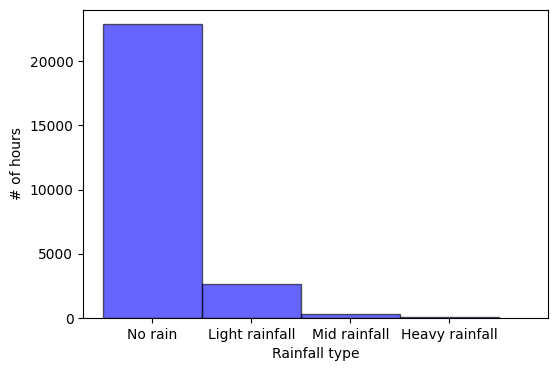

(array([22882,  2605,   280,    30]), array([0, 1, 2, 3, 4]))

In [24]:
rain_counts, classes = np.histogram(processed_df_train['class'].values, bins=np.arange(0,5))

plt.figure(figsize=(6,4))
# plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,4), width=1, height=rain_counts, facecolor='blue', edgecolor='k', alpha=0.6)
plt.xticks(np.arange(0,5))
plt.ylabel('# of hours')
plt.xticks(ticks=np.arange(0,4), labels=['No rain', 'Light rainfall', 'Mid rainfall',  'Heavy rainfall'])
plt.xlabel('Rainfall type')
# plt.yscale('log')
plt.show()
rain_counts, classes

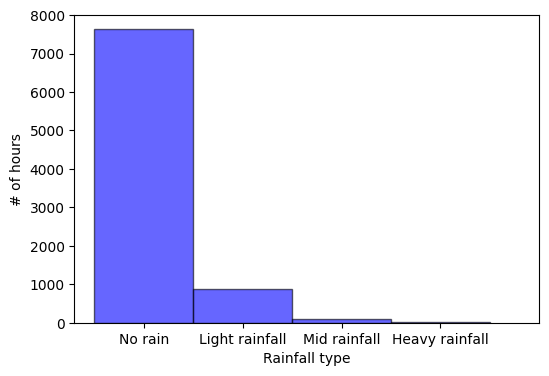

(array([7627,  875,   89,    9]), array([0, 1, 2, 3, 4]))

In [25]:
rain_counts, classes = np.histogram(processed_df_val['class'].values, bins=np.arange(0,5))

plt.figure(figsize=(6,4))
# plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,4), width=1, height=rain_counts, facecolor='blue', edgecolor='k', alpha=0.6)
plt.xticks(np.arange(0,5))
plt.ylabel('# of hours')
plt.xticks(ticks=np.arange(0,4), labels=['No rain', 'Light rainfall', 'Mid rainfall',  'Heavy rainfall'])
plt.xlabel('Rainfall type')
# plt.yscale('log')
plt.show()
rain_counts, classes

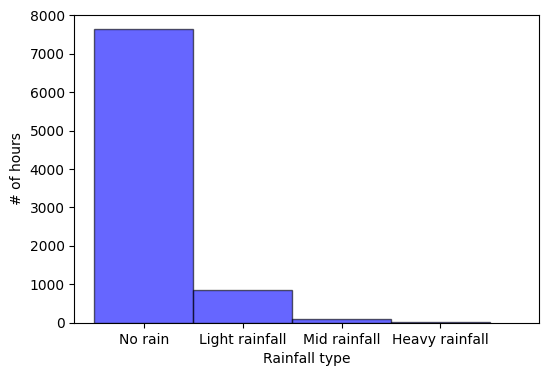

(array([7636,  861,   95,    8]), array([0, 1, 2, 3, 4]))

In [26]:
rain_counts, classes = np.histogram(processed_df_test['class'].values, bins=np.arange(0,5))

plt.figure(figsize=(6,4))
# plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,4), width=1, height=rain_counts, facecolor='blue', edgecolor='k', alpha=0.6)
plt.xticks(np.arange(0,5))
plt.ylabel('# of hours')
plt.xticks(ticks=np.arange(0,4), labels=['No rain', 'Light rainfall', 'Mid rainfall',  'Heavy rainfall'])
plt.xlabel('Rainfall type')
# plt.yscale('log')
plt.show()
rain_counts, classes

In [27]:
processed_data_train = processed_df_train.values.astype(float)
processed_data_train = processed_data_train[~np.isnan(processed_data_train).any(axis=1)]
processed_data_train.shape

(25737, 6)

In [28]:
processed_data_val = processed_df_val.values.astype(float)
processed_data_val = processed_data_val[~np.isnan(processed_data_val).any(axis=1)]
processed_data_val.shape

(8575, 6)

In [29]:
processed_data_test = processed_df_test.values.astype(float)
processed_data_test = processed_data_test[~np.isnan(processed_data_test).any(axis=1)]
processed_data_test.shape

(8580, 6)

In [30]:
print(f'Data Shape: {data_arr.shape}')
print(f'Data Entry: [Month, Time of Day, Temperature, Relative Humidity, Pressure, Rain type]')

# Pre-Processed
print(data_arr[0])

# Post-Processed
print(processed_data_train[0])
print(processed_data_val[0])
print(processed_data_test[0])

Data Shape: (175845, 6)
Data Entry: [Month, Time of Day, Temperature, Relative Humidity, Pressure, Rain type]
['2004-05-01' '00:00' 78.8 1013.4 14.3 0.0]
[1.0000e+00 1.0000e+00 5.3400e+01 8.6600e+01 1.0152e+03 1.0000e+00]
[   4.     3.    40.9   81.7 1020.3    0. ]
[6.0000e+00 1.0000e+00 4.7100e+01 8.0000e+01 1.0214e+03 0.0000e+00]


In [31]:
x_data_train = processed_data_train[:, :processed_data_train.shape[1]-1]
y_data_train = processed_data_train[:, processed_data_train.shape[1]-1:].astype(int)
print(x_data_train[0], y_data_train[0])

[1.0000e+00 1.0000e+00 5.3400e+01 8.6600e+01 1.0152e+03] [1]


In [32]:
x_data_val = processed_data_val[:, :processed_data_train.shape[1]-1]
y_data_val = processed_data_val[:, processed_data_train.shape[1]-1:].astype(int)
print(x_data_val[0], y_data_val[0])

[   4.     3.    40.9   81.7 1020.3] [0]


In [33]:
x_data_test = processed_data_test[:, :processed_data_train.shape[1]-1]
y_data_test = processed_data_test[:, processed_data_train.shape[1]-1:].astype(int)
print(x_data_test[0], y_data_test[0])

[6.0000e+00 1.0000e+00 4.7100e+01 8.0000e+01 1.0214e+03] [0]


In [34]:
# # Assuming X is your feature matrix and y is your target vector
# # First split: train+val and test
# X_train_val, X_test, y_train_val, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# # Second split: train and val
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# # Now you have X_train, X_val, X_test, y_train, y_val, y_test
# print(f"Training set size: {X_train.shape[0]}")
# print(f"Validation set size: {X_val.shape[0]}")
# print(f"Test set size: {X_test.shape[0]}")

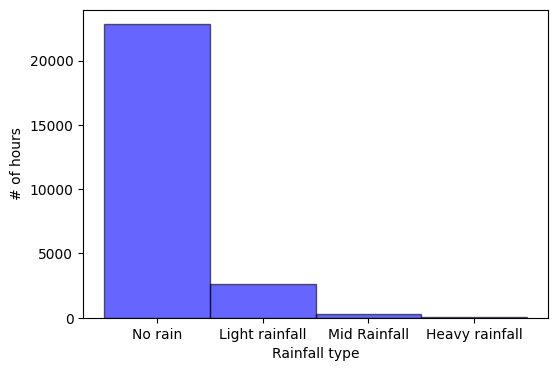

(array([22822,  2605,   280,    30]), array([0, 1, 2, 3, 4]))

In [35]:
rain_counts, classes = np.histogram(y_data_train, bins=np.arange(0,5))

plt.figure(figsize=(6,4))
# plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,4), width=1, height=rain_counts, facecolor='blue', edgecolor='k', alpha=0.6)
plt.ylabel('# of hours')
plt.xticks(ticks=np.arange(0,4), labels=['No rain', 'Light rainfall', 'Mid Rainfall', 'Heavy rainfall'])
plt.xlabel('Rainfall type')
# plt.yscale('log')
plt.show()
rain_counts, classes

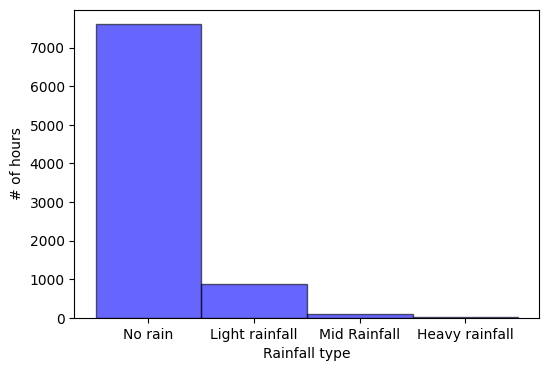

(array([7602,  875,   89,    9]), array([0, 1, 2, 3, 4]))

In [36]:
rain_counts, classes = np.histogram(y_data_val, bins=np.arange(0,5))

plt.figure(figsize=(6,4))
# plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,4), width=1, height=rain_counts, facecolor='blue', edgecolor='k', alpha=0.6)
plt.ylabel('# of hours')
plt.xticks(ticks=np.arange(0,4), labels=['No rain', 'Light rainfall', 'Mid Rainfall', 'Heavy rainfall'])
plt.xlabel('Rainfall type')
# plt.yscale('log')
plt.show()
rain_counts, classes

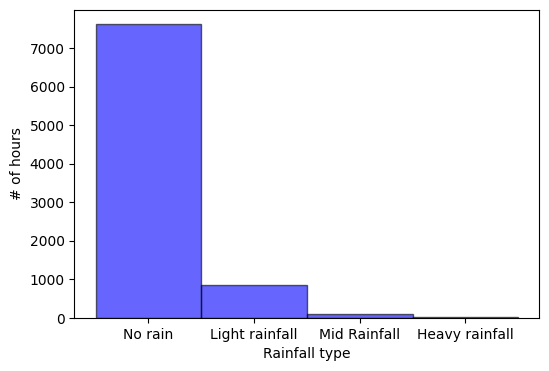

(array([7616,  861,   95,    8]), array([0, 1, 2, 3, 4]))

In [37]:
rain_counts, classes = np.histogram(y_data_test, bins=np.arange(0,5))

plt.figure(figsize=(6,4))
# plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,4), width=1, height=rain_counts, facecolor='blue', edgecolor='k', alpha=0.6)
plt.ylabel('# of hours')
plt.xticks(ticks=np.arange(0,4), labels=['No rain', 'Light rainfall', 'Mid Rainfall', 'Heavy rainfall'])
plt.xlabel('Rainfall type')
# plt.yscale('log')
plt.show()
rain_counts, classes

In [38]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state = 42)

In [39]:
x_train_res, y_train_res = smote.fit_resample(x_data_train, y_data_train.ravel())

In [40]:
x_data_val.shape, y_data_val.shape

((8575, 5), (8575, 1))

In [41]:
x_val_res, y_val_res = smote.fit_resample(x_data_val, y_data_val.ravel())

In [42]:
x_data_test.shape, y_data_test.shape

((8580, 5), (8580, 1))

In [43]:
x_test_res, y_test_res = smote.fit_resample(x_data_test, y_data_test.ravel()) 

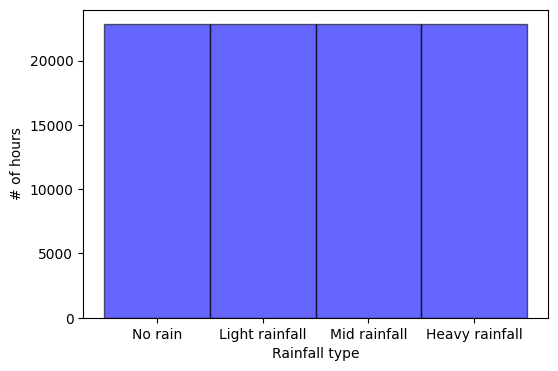

(array([22822, 22822, 22822, 22822]), array([0, 1, 2, 3, 4]))

In [44]:
rain_counts, classes = np.histogram(y_train_res, bins=np.arange(0,5))

plt.figure(figsize=(6,4))
# plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,4), width=1, height=rain_counts, facecolor='blue', edgecolor='k', alpha=0.6)
# plt.xticks(np.arange(0,4))
plt.ylabel('# of hours')
plt.xticks(ticks=np.arange(0,4), labels=['No rain', 'Light rainfall', 'Mid rainfall', 'Heavy rainfall'])
plt.xlabel('Rainfall type')
plt.show()
rain_counts, classes

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train_res)
X_val_scaled = scaler.transform(x_val_res)

# Define the model
model = models.Sequential()

# Input layer
model.add(layers.Input(shape=(5,)))

# Hidden layers
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))

# Output layer
model.add(layers.Dense(4, activation='softmax'))  # Softmax for multiclass classification

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Early stopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Print model summary
model.summary()

Metal device set to: Apple M2

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 2,596
Trainable params: 2,596
Non-trainable params: 0
___________________________________________

2024-05-22 23:15:29.375845: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-22 23:15:29.376615: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [46]:
X_train_scaled.shape, y_train_res.shape

((91288, 5), (91288,))

In [47]:
X_val_scaled.shape, y_val_res.shape

((30408, 5), (30408,))

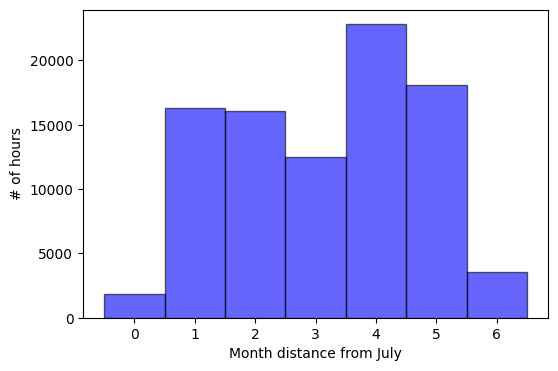

(array([ 1880, 16345, 16042, 12522, 22807, 18114,  3578]),
 array([0, 1, 2, 3, 4, 5, 6, 7]))

In [48]:
binwidth = 1
rain_counts, classes = np.histogram(x_train_res[:,0], bins=np.arange(0,7+binwidth,binwidth))

plt.figure(figsize=(6,4))
# plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,7,binwidth), width=binwidth, height=rain_counts, facecolor='blue', edgecolor='k', alpha=0.6)
# plt.xticks(np.arange(-1,1+binwidth,binwidth))
plt.ylabel('# of hours')
# plt.xticks(ticks=np.arange(0,4), labels=['No rain', 'Light rainfall', 'Mid rainfall', 'Heavy rainfall'])
plt.xlabel('Month distance from July')
plt.show()
rain_counts, classes

In [49]:
X_train_scaled

array([[-1.53155801, -0.48395652,  0.19508583,  0.54919021,  0.90879715],
       [-0.24384619, -0.48395652, -0.16444351, -0.45290138, -1.48395005],
       [ 0.40000972,  1.43545236,  0.39119275, -0.10016514,  1.11633134],
       ...,
       [-0.90383032,  0.49978795,  0.75752329, -0.29715377,  0.97439949],
       [-1.4039919 ,  1.43545236,  0.89966373, -0.77016894,  0.61407443],
       [-1.53155801, -0.07183343,  0.82063909,  0.47571602,  0.43717982]])

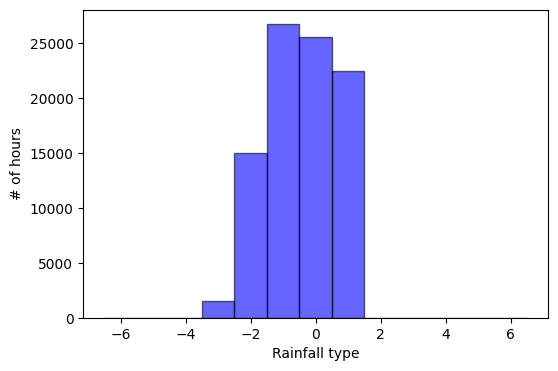

(array([    0,     0,     0,  1549, 14987, 26714, 25547, 22491,     0,
            0,     0,     0,     0]),
 array([-6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7]))

In [50]:
binwidth = 1
rain_counts, classes = np.histogram(X_train_scaled[:,0], bins=np.arange(-6,7+binwidth,binwidth))

plt.figure(figsize=(6,4))
# plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(-6,7,binwidth), width=binwidth, height=rain_counts, facecolor='blue', edgecolor='k', alpha=0.6)
# plt.xticks(np.arange(-1,1+binwidth,binwidth))
plt.ylabel('# of hours')
# plt.xticks(ticks=np.arange(0,4), labels=['No rain', 'Light rainfall', 'Mid rainfall', 'Heavy rainfall'])
plt.xlabel('Rainfall type')
plt.show()
rain_counts, classes

In [51]:
# Train the Model:
history = model.fit(
    X_train_scaled, y_train_res,
    epochs=50,
    batch_size=32,
    validation_data=(X_val_scaled, y_val_res),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50


2024-05-22 23:15:30.010865: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-05-22 23:15:30.237411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2853/2853 [==============================] - ETA: 0s - loss: 1.0267 - accuracy: 0.5687

2024-05-22 23:15:55.492595: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2853/2853 [==============================] - 31s 11ms/step - loss: 1.0267 - accuracy: 0.5687 - val_loss: 1.2165 - val_accuracy: 0.4357 - lr: 0.0010
Epoch 2/50
2853/2853 [==============================] - 25s 9ms/step - loss: 0.9121 - accuracy: 0.6171 - val_loss: 1.3772 - val_accuracy: 0.4409 - lr: 0.0010
Epoch 3/50
2853/2853 [==============================] - 24s 9ms/step - loss: 0.8782 - accuracy: 0.6304 - val_loss: 1.3862 - val_accuracy: 0.4320 - lr: 0.0010
Epoch 4/50
2853/2853 [==============================] - 24s 9ms/step - loss: 0.8585 - accuracy: 0.6400 - val_loss: 1.5078 - val_accuracy: 0.4314 - lr: 0.0010
Epoch 5/50
2853/2853 [==============================] - 24s 8ms/step - loss: 0.8455 - accuracy: 0.6454 - val_loss: 1.6262 - val_accuracy: 0.4382 - lr: 0.0010
Epoch 6/50
2853/2853 [==============================] - 24s 9ms/step - loss: 0.8367 - accuracy: 0.6493 - val_loss: 1.6694 - val_accuracy: 0.4389 - lr: 0.0010
Epoch 7/50
2853/2853 [==============================] - 24s 8m

In [52]:
# Evaluation (Is it worth, the loss is quite high suggesting that either the model architecture is quite poor (likely) or 
# that we need to better preprocess our data such as rain (also likely))

In [53]:
X_test_scaled = scaler.transform(x_test_res)

In [54]:
predictions = model.predict(X_test_scaled)

 73/952 [=>............................] - ETA: 1s

2024-05-22 23:20:04.103802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


952/952 [==============================] - 2s 2ms/step


In [55]:
np.argmax(predictions[0])

0

In [56]:
y_test_res[0]

0

In [57]:
model.evaluate(X_test_scaled, y_test_res.astype(float), verbose=2)

2024-05-22 23:20:06.205360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


952/952 - 4s - loss: 1.0409 - accuracy: 0.5354 - 4s/epoch - 4ms/step


[1.0408765077590942, 0.5354188680648804]

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

In [59]:
y_test_res

array([0, 0, 0, ..., 3, 3, 3])

In [60]:
np.argmax(predictions,axis=1)

array([0, 0, 0, ..., 2, 2, 3])

Confusion Matrix:
[[5407 1423  223  563]
 [1159 3043 2137 1277]
 [ 380 1652 4373 1211]
 [ 146  607 3375 3488]]


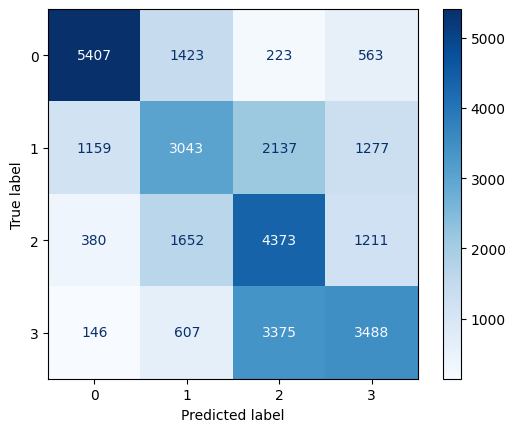

In [61]:
cm = confusion_matrix(y_test_res, np.argmax(predictions,axis=1))

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [62]:
f1_score(y_test_res, np.argmax(predictions,axis=1), average=None)

array([0.73524612, 0.42437766, 0.4934552 , 0.49282939])